# Bank Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to build a model that predicts if the client will subscribe a term deposit (variable y).

We will first find which features are relevant towards predicting y and then create a logistic regression model and evaluate its accuracy (we do not want overfitting or underfitting)

Dataset found at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### NOTE: CSV file was converted from text to columns using Excel before starting, raw data from website is not clean

In [2]:
#take a look at the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#checking for null data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
#how many clients subscribe to a term deposit
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

^^^ only 13.2% (5289/39922) of clients subscribes to a term deposit

## What continous features are  predictors for y?

Our goal is to examine which features most strongly associate with purchasing y

In [5]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


^^^ we can see that the features where the mean changes accoriding to y values are:

'balance' (current financial balance on clients account) 

'duration' (last contact duration, in seconds (numeric))

'pdays' (number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

'previous' (number of contacts performed before this campaign and for this client (numeric))

### What categorical features are predictors for y?

We will examine a number of features using graphs against y

Text(0, 0.5, 'Y Purchase')

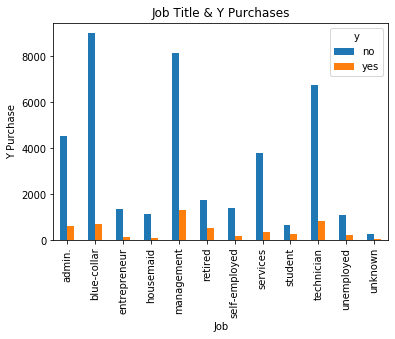

In [6]:
#examining which job titles ara associated with purchasing y
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Job Title & Y Purchases')
plt.xlabel('Job')
plt.ylabel('Y Purchase')

Text(0, 0.5, 'Y Purchase')

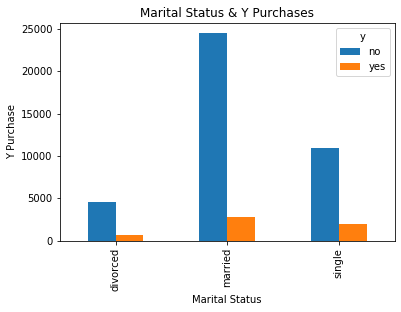

In [7]:
#examining which marital status are associated with purchasing y
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Marital Status & Y Purchases')
plt.xlabel('Marital Status')
plt.ylabel('Y Purchase')

Text(0, 0.5, 'Y Purchase')

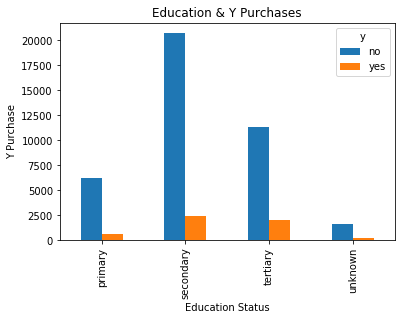

In [8]:
#examining which education level is associated with purchasing y
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Education & Y Purchases')
plt.xlabel('Education Status')
plt.ylabel('Y Purchase')

Text(0, 0.5, 'Y Purchase')

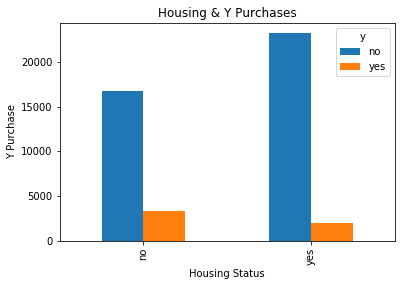

In [9]:
#examining whether housing is associated with purchasing y
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Housing & Y Purchases')
plt.xlabel('Housing Status')
plt.ylabel('Y Purchase')

Text(0, 0.5, 'Y Purchase')

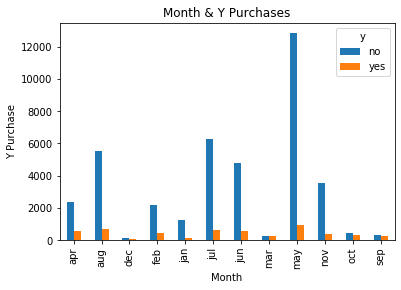

In [10]:
#examining whether months is associated with purchasing y
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Month & Y Purchases')
plt.xlabel('Month')
plt.ylabel('Y Purchase')

## Creating test and training sets

Since our graphs do not show any clear relationship between the categorical features and y, we will focus only on the binary features 'balance', 'duration', 'pdays', 'previous'

In [11]:
from sklearn.model_selection import train_test_split

#Only selecting significant features
features = ['balance', 'duration', 'pdays', 'previous']
X = data[features]
y = data['y']


#Setting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#fitting train data into model
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

#fitting test data into model
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.89


In [29]:
#evaluating predictions from model
predictions = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      9978
         yes       0.58      0.16      0.25      1325

    accuracy                           0.89     11303
   macro avg       0.74      0.57      0.59     11303
weighted avg       0.86      0.89      0.86     11303



^^^A weighted average accuracy of 86%, not bad

In [31]:
#confusion metrics to measure Accuracy and error rates
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[9824  154]
 [1115  210]]


### From our confusion matrix we conclude that:

True positive: 9824

True negative: 210

False positive: 154

False negative: 1115

Accuracy = (TP+TN)/total

Accuracy = (9824+210)/11303 ~ 89%

Error Rate = (FP+FN)/total

Error rate = (154+1115)/11303 ~11%